# Octave Programming Assignment: 

## Linear Regression

## 2020년 07월 26일 안상호


# Introduction

In this exercise, you will implement linear regression and get to see it work
on data. Before starting on this programming exercise, we strongly recom-
mend watching the video lectures and completing the review questions for
the associated topics.
To get started with the exercise, you will need to download the starter
code and unzip its contents to the directory where you wish to complete the
exercise. If needed, use the cd command in Octave/MATLAB to change to
this directory before starting this exercise.
You can also find instructions for installing Octave/MATLAB in the “En-
vironment Setup Instructions” of the course website.

# 1. Simple Octave / MATLAB function

In [1]:
warmUpExercise()

ans =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



# 2. Linear regression with one variable

## 2.1. Plotting the Data

In [2]:
data = load('ex1data1.txt'); % read comma seprated data
X = data(:, 1); y = data(:, 2);
m = length(y);

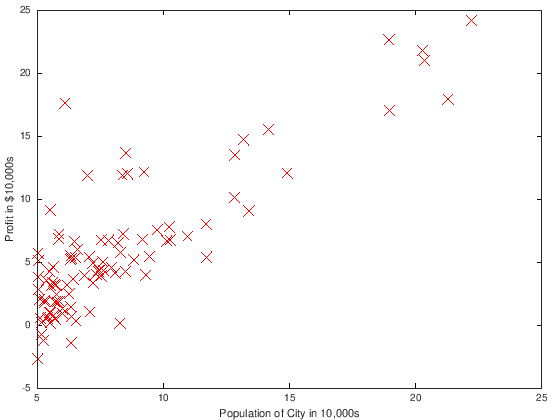

In [3]:
plot(X, y, 'rx', 'MarkerSize', 10);
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');
% Plot the data
% Set the y−axis label
% Set the x−axis label

## 2.2. Gradient Descent

### 2.2.1. Update Equations
- cost function
$$J(\theta) = \cfrac{1}{2m} \sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)^2 $$

이 식에서 $i$는 몇번째 훈련 데이터인지를 나타내며, 결론적으로 모든($m$) 훈련 데이터에서 오차를 계산하여 제곱하고 이를 합산한다.  

- hypothesis


$$h_{\theta}(x) = \theta^{T}x$$


### 2.2.2. Implementation


In [4]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters
iterations = 1500;
alpha = 0.01;

### 2.2.3. Computing the cost $J(\theta)$

In [5]:
function J = computeCost(X, y, theta)
%COMPUTECOST Compute cost for linear regression
%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta
%               You should set J to the cost.

predictions =  X * theta; % predictions of hypothesis on all m examples

sqrErrors = (predictions - y).^2; % squred error

J = 1 / (2*m) * sum(sqrErrors);

% =========================================================================

end

In [6]:
computeCost(X, y, theta)

ans =  32.073


### 2.2.4. Gradient Descent

simultaneously update $\theta_j$ for all $j$

$$\theta_j := \theta_j - \alpha \cfrac{1}{m}\sum_{i=1}^{m}\big(  h_{\theta}(x^{(i)}) - y^{(i)}  \big)x_{j}^{(i)}$$

자동으로 행렬 연산을 통해 `sum`이 적용되므로, `sum`을 쓸 필요는 없다.

In [7]:
% X: (m x 2) -> X':(2 x m)

% alpha / m * ((X * theta - y)' * X)

(X' * (X * theta - y))

ans =

   -566.40
  -6336.90



In [12]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters,

    % ====================== YOUR CODE HERE ======================
    % Instructions: Perform a single gradient step on the parameter vector
    %               theta. 
    %
    % Hint: While debugging, it can be useful to print out the values
    %       of the cost function (computeCost) and gradient here.
    %
    
    theta -= (alpha/m)* (X' * (X * theta - y));
    % ============================================================

    % Save the cost J in every iteration    
    J_history(iter) = computeCost(X, y, theta);

end

end

In [16]:
[theta, J_history] = gradientDescent(X, y, theta, alpha, iterations);
theta

theta =

  -3.8946
   1.1929



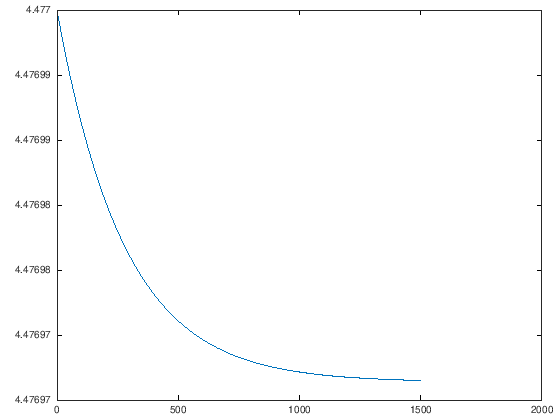

In [17]:
plot(J_history)

In [15]:
predict1 = [1, 3.5] * theta
predict2 = [1, 7] * theta

predict1 =  0.29133
predict2 =  4.4607


## 2.4. Visualizeing $J(\theta)$

Visualizing J(theta_0, theta_1) ...


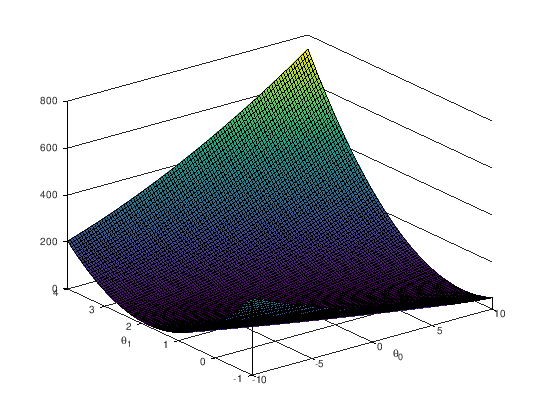

In [22]:
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
        t = [theta0_vals(i); theta1_vals(j)];
        J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');



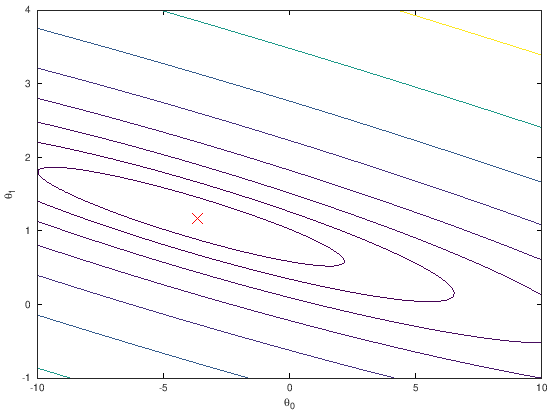

In [23]:
% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);


# 3. Linear regression with multiple variable



In [57]:
function X_head = head(X, n=5)

X_head = X(1:n, :);

endfunction

## 3.1. Feature Normalization

`featureNormalize.m`

In [46]:
fprintf('Loading data ...\n');

%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

Loading data ...
First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 


$$\cfrac{X - \mu_X}{\sigma_X}$$

주의할 점은 연산할때, 행렬과 다차원의 벡터를 element-wise하게 연산해야하기 때문에 `.-` 나 `./` 연산자를 사용한다는 것이다.

In [47]:
function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

% You need to set these values correctly
% X_norm = X;
mu = mean(X); % zeros(1, size(X, 2));
sigma = std(X); % zeros(1, size(X, 2));

% ====================== YOUR CODE HERE ======================
% Instructions: First, for each feature dimension, compute the mean
%               of the feature and subtract it from the dataset,
%               storing the mean value in mu. Next, compute the 
%               standard deviation of each feature and divide
%               each feature by it's standard deviation, storing
%               the standard deviation in sigma. 
%
%               Note that X is a matrix where each column is a 
%               feature and each row is an example. You need 
%               to perform the normalization separately for 
%               each feature. 
%
% Hint: You might find the 'mean' and 'std' functions useful.
%       

X_norm = (X .- mu) ./ sigma;







% ============================================================

end

In [48]:
% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);

% Add intercept term to X
X = [ones(m, 1) X];

Normalizing Features ...


In [58]:
head(X)

ans =

   1.00000   0.13001  -0.22368
   1.00000  -0.50419  -0.22368
   1.00000   0.50248  -0.22368
   1.00000  -0.73572  -1.53777
   1.00000   1.25748   1.09042



## 3.2. Gradient Descent

`computeCostMulti.m` and `gradientDescentMulti.m`

### 3.2.1. Compute Cost
$$
\begin{align}
J(\theta) &= \cfrac{1}{2m} \sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)^2 \\
          &= \cfrac{1}{2m} (X\theta - \vec{y})^{T}(X\theta - \vec{y})
\end{align}
$$

In [61]:

% Choose some initial value
alpha = 0.01;
num_iters = 400;

theta = zeros(3, 1);


Running gradient descent ...


In [64]:
function J = computeCostMulti(X, y, theta)
%COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
%   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta
%               You should set J to the cost.


h = X * theta;
J = (1/(2*m))* (h - y)' * (h - y);



% =========================================================================

end


In [65]:
computeCostMulti(X, y, theta)

ans =  65591548106.45744


### 3.2.2. Running gradient descent

$$\theta_j := \theta_j - \alpha \cfrac{1}{m}\sum_{i=1}^{m}\big(  h_{\theta}(x^{(i)}) - y^{(i)}  \big)x_{j}^{(i)}$$


In [68]:
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)
%GRADIENTDESCENTMULTI Performs gradient descent to learn theta
%   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters

    % ====================== YOUR CODE HERE ======================
    % Instructions: Perform a single gradient step on the parameter vector
    %               theta. 
    %
    % Hint: While debugging, it can be useful to print out the values
    %       of the cost function (computeCostMulti) and gradient here.
    % (3 X 47), (47, 1) 
    
    theta -= (alpha / m) * (X' * (X*theta - y));
    
    

    % ============================================================

    % Save the cost J in every iteration    
    J_history(iter) = computeCostMulti(X, y, theta);

end

end


In [69]:
fprintf('Running gradient descent ...\n');

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

Running gradient descent ...


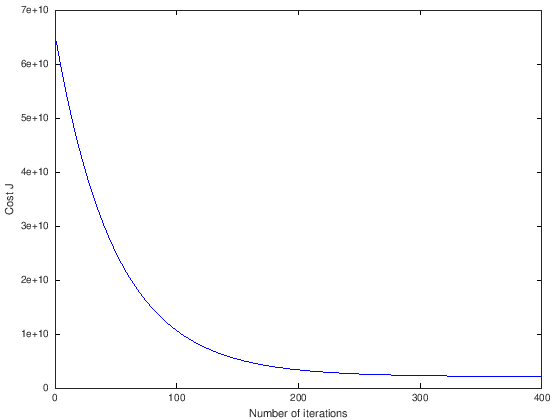

In [74]:
% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');



In [75]:
% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');


Theta computed from gradient descent: 
 334302.063993 
 100087.116006 
 3673.548451 



In [83]:
% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
% Recall that the first column of X is all-ones. Thus, it does
% not need to be normalized.

X_i = [1650 3];
X_norm = (X_i .- mu) ./ sigma 



price = [ones(1) X_norm] * theta; % You should change this


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

X_norm =

  -0.44127  -0.22368

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289314.620338
Program paused. Press enter to continue.


## 3.3. Normal Equations

`normalEqn.m`

- n x n 의 inverse

$$ \theta = (X^TX)^{-1} X^T \vec{y} $$

- m x n 의 inverse
$$X \theta = \vec{y} \rightarrow \theta = X^{-1} \vec{y}$$


In [85]:
%% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

head(X)

ans =

      1   2104      3
      1   1600      3
      1   2400      3
      1   1416      2
      1   3000      4



In [91]:
pinv(X' * X) * X' * y

ans =

   89597.90954
     139.21067
   -8738.01911



In [87]:
pinv(X) * y

ans =

   89597.90954
     139.21067
   -8738.01911



In [94]:
function [theta] = normalEqn(X, y)
%NORMALEQN Computes the closed-form solution to linear regression 
%   NORMALEQN(X,y) computes the closed-form solution to linear 
%   regression using the normal equations.

theta = zeros(size(X, 2), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the code to compute the closed form solution
%               to linear regression and put the result in theta.
%

% ---------------------- Sample Solution ----------------------

theta = pinv(X' * X) * X' * y;


% -------------------------------------------------------------


% ============================================================

end

In [95]:


% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');




Theta computed from the normal equations: 
 89597.909544 
 139.210674 
 -8738.019113 



In [96]:
% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================

X_i = [1 1650 3]

price = X_i * theta; % You should change this


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);



X_i =

      1   1650      3

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
